### 데이터 시각화 및 머신러닝 모델 구축

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


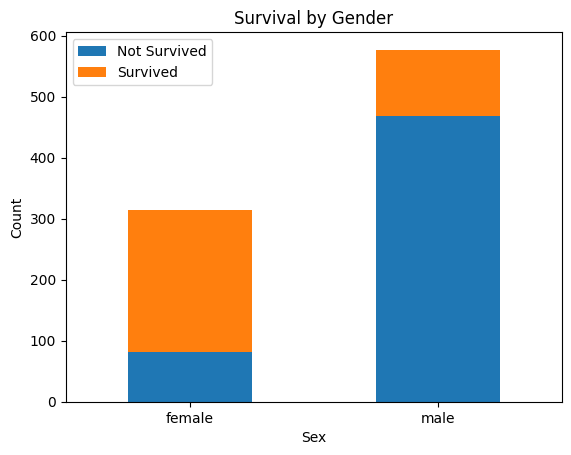

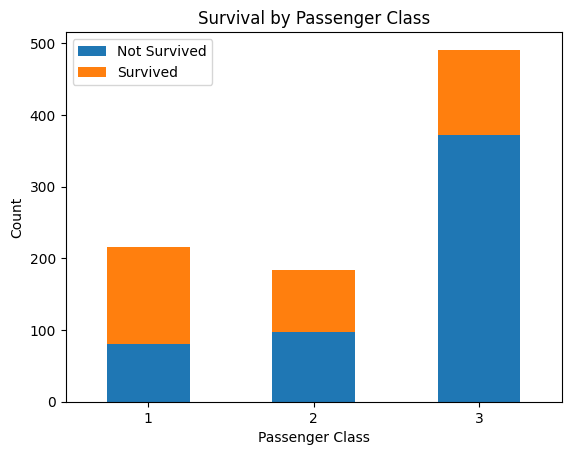

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 캐글의 타이타닉 데이터셋 가져오기
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# 데이터 확인
print(titanic_df.head())

# 성별에 따른 생존자 수 시각화
survived_sex = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
survived_sex.plot(kind='bar', stacked=True)
plt.title('Survival by Gender')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()

# 객실 등급에 따른 생존자 수 시각화
survived_pclass = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()
survived_pclass.plot(kind='bar', stacked=True)
plt.title('Survival by Passenger Class')
plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()


### Seaborn을 활용한 시각화

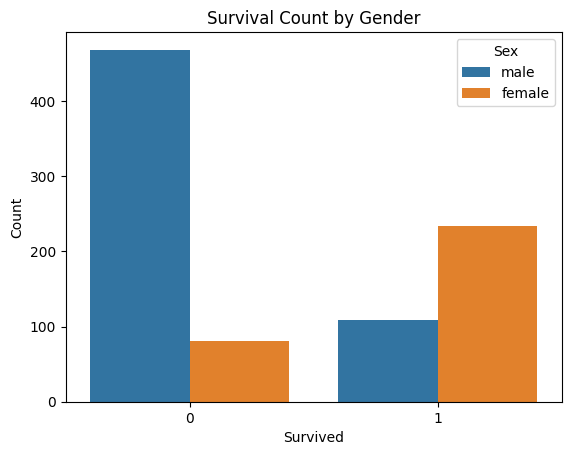

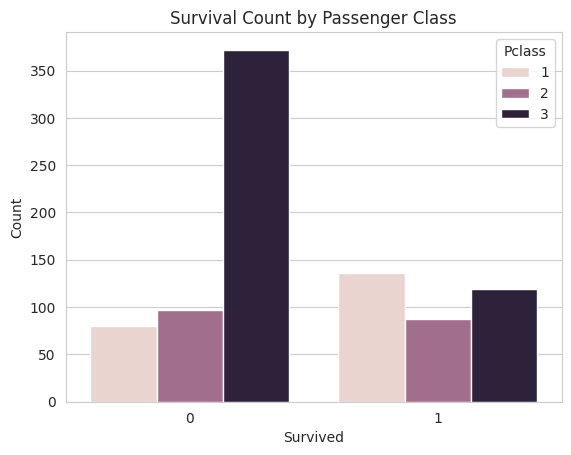

In [2]:
import pandas as pd
import seaborn as sns

# 캐글의 타이타닉 데이터셋 가져오기
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# 성별에 따른 생존자 수 시각화
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
sns.set_style('whitegrid')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 객실 등급에 따른 생존자 수 시각화
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
sns.set_style('whitegrid')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


### 나의 머신러닝 모델 만들기

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 캐글의 타이타닉 데이터셋 가져오기
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# 데이터 전처리: 필요한 특성 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic_df[features]
y = titanic_df['Survived']

# 데이터 전처리: 범주형 변수 더미화
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# 데이터 전처리: 결측치 처리
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습: 랜덤 포레스트 분류기 사용
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가: 정확도
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8100558659217877
